In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from keras.optimizers import Adam,SGD

C:\Users\sourabh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sourabh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sourabh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sourabh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [2]:
from keras.models import Sequential

In [3]:
import tensorflow as tf

In [4]:
import glob

In [89]:
filenames = glob.glob("input/*.jpg")
filenames.sort()
input_img = [cv2.imread(img) for img in filenames]

In [6]:
filenames = glob.glob("output/*.jpg")
filenames.sort()
output_img = [cv2.imread(img) for img in filenames]

In [7]:
input_img[3].shape

(50, 284)

In [8]:
output_img[1].shape

(35, 256)

In [9]:
def preprocess(img):
    (h, w) = img.shape
    
    final_img = np.ones([64, 256])*255 
    
    # crop
    if w > 256:
        img = img[:, :256]
        
    if h > 64:
        img = img[:64, :]
    
    
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

In [10]:
for i in range(len(input_img)):
    input_img[i]=preprocess(input_img[i])

In [11]:
input_img[0].shape

(256, 64)

In [12]:
def preprocess_o(img):
    (h, w) = img.shape
    
    final_img = np.ones([32, 256])*255 
        
    if h > 32:
        img = img[:32, :]
    
    
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

In [13]:
for i in range(len(output_img)):
    output_img[i]=preprocess_o(output_img[i])

In [14]:
output_img[1].shape

(256, 32)

In [15]:
output_img = np.array(output_img).reshape(-1, 256, 32, 1)

In [16]:
input_img = np.array(input_img).reshape(-1, 256, 64, 1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(input_img, output_img, test_size=0.15)

In [19]:
y_train.shape

(8500, 256, 32, 1)

In [20]:
inputd = Input(shape=(256, 64, 1), name='input')
l1=Conv2D(32, (3, 3), padding='same', name='conv1', activation='relu')(inputd)
l2=Conv2D(64, (3, 3), padding='same', name='conv2', activation='relu')(l1)
l3= MaxPooling2D(pool_size=(1, 2), name='max2')(l2)
l4=Conv2D(128, (3, 3), padding='same', name='conv3', activation='relu')(l3)
l5=Conv2D(64, (3, 3), padding='same', name='conv4', activation='relu')(l4)
l6=Conv2D(32, (3, 3), padding='same', name='conv5', activation='relu')(l5)
l7=Conv2D(8, (3, 3), padding='same', name='conv6', activation='relu')(l6)
l8=Conv2D(2, (3, 3), padding='same', name='conv7', activation='relu')(l7)
output=Conv2D(1, (3, 3), padding='same', name='conv8', activation='relu')(l8)
model = Model(inputs=inputd, outputs=output)

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 256, 64, 1)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 64, 32)       320       
_________________________________________________________________
conv2 (Conv2D)               (None, 256, 64, 64)       18496     
_________________________________________________________________
max2 (MaxPooling2D)          (None, 256, 32, 64)       0         
_________________________________________________________________
conv3 (Conv2D)               (None, 256, 32, 128)      73856     
_________________________________________________________________
conv4 (Conv2D)               (None, 256, 32, 64)       73792     
_________________________________________________________________
conv5 (Conv2D)               (None, 256, 32, 32)       1846

In [22]:
def ssim_loss(y_true, y_pred):
    return tf.reduce_mean(tf.image.ssim(y_true, y_pred, 2.0))

In [23]:
model.compile(optimizer='sgd', loss=ssim_loss, metrics=[ssim_loss])

In [24]:
hist=model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=5,batch_size=140)


Train on 8500 samples, validate on 1500 samples
Epoch 1/5
8500/8500 [==============================] - 2150s 253ms/step - loss: 1.8649e-06 - ssim_loss: 1.8655e-06 - val_loss: 1.8475e-06 - val_ssim_loss: 1.8433e-06A: 45:55 - loss: 1.9128e-06 - ssim_loss: 1.9128e- - ETA: 48:23 - l
Epoch 2/5
8500/8500 [==============================] - 1803s 212ms/step - loss: 1.8511e-06 - ssim_loss: 1.8510e-06 - val_loss: 1.8347e-06 - val_ssim_loss: 1.8307e-06
Epoch 3/5
8500/8500 [==============================] - 1748s 206ms/step - loss: 1.8468e-06 - ssim_loss: 1.8476e-06 - val_loss: 1.8284e-06 - val_ssim_loss: 1.8244e-06
Epoch 4/5
8500/8500 [==============================] - 1760s 207ms/step - loss: 1.8269e-06 - ssim_loss: 1.8267e-06 - val_loss: 1.8093e-06 - val_ssim_loss: 1.8054e-06
Epoch 5/5
8500/8500 [==============================] - 1700s 200ms/step - loss: 1.8072e-06 - ssim_loss: 1.8078e-06 - val_loss: 1.7901e-06 - val_ssim_loss: 1.7862e-06


In [25]:
ypred=model.predict(X_test)

In [73]:
model.save('m_ssim.h5')

In [47]:
ypred=ypred.reshape(-1,256,32)

In [48]:
ypred.shape

(1500, 256, 32)

In [50]:
def preprocess_out(img):
    (h, w) = img.shape
    
    final_img = np.ones([ 256,32])*255     
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_COUNTERCLOCKWISE)

In [53]:
y_pred=[]
for i in range(len(ypred)):
    y_pred.append(preprocess_out(ypred[i]))

In [54]:
y_pred[0].shape

(32, 256)

In [60]:
y_pred[4]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.88625324],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0480418 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.09406641],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.16358614],
       [0.        , 0.        , 2.11842942, ..., 1.91978168, 1.23429322,
        2.66333413],
       [1.33842134, 1.64083135, 2.72191381, ..., 4.83530569, 0.42712373,
        1.86460578]])

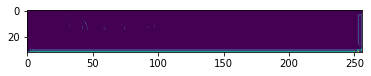

In [59]:
plt.imshow(y_pred[4])

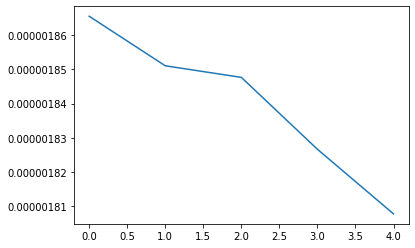

In [67]:
plt.plot(hist.history['ssim_loss'])

In [72]:
def mk_model():
    model=Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', name='conv1', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', name='conv2', activation='relu'))
    model.add(MaxPooling2D(pool_size=(1, 2), name='max2'))
    model.add(Conv2D(128, (3, 3), padding='same', name='conv3', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', name='conv4', activation='relu'))
    model.add(Conv2D(1, (3, 3), padding='same', name='conv5', activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model
    

In [75]:
model=mk_model()

In [77]:
model

In [80]:
hist=model.fit(X_train,y_train, epochs=5,batch_size=130)

Epoch 1/5
8500/8500 [==============================] - 1303s 153ms/step - loss: 3573.4020 - accuracy: 0.0148
Epoch 2/5
8500/8500 [==============================] - 1156s 136ms/step - loss: 1564.4207 - accuracy: 0.0729
Epoch 3/5
8500/8500 [==============================] - 1143s 134ms/step - loss: 1557.2839 - accuracy: 0.0791
Epoch 4/5
8500/8500 [==============================] - 1149s 135ms/step - loss: 1554.5569 - accuracy: 0.0753
Epoch 5/5
8500/8500 [==============================] - 1173s 138ms/step - loss: 1552.3554 - accuracy: 0.0828


In [81]:
ypred=model.predict(X_test)

In [82]:
model.save('m_mse.h5')

In [83]:
ypred=ypred.reshape(-1,256,32)

In [84]:
y_pred=[]
for i in range(len(ypred)):
    y_pred.append(cv2.rotate(ypred[i], cv2.ROTATE_90_COUNTERCLOCKWISE))

In [92]:
xtest=[]
for i in range(len(X_test)):
    xtest.append(cv2.rotate(X_test[i], cv2.ROTATE_90_COUNTERCLOCKWISE))

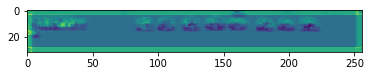

In [86]:
plt.imshow(y_pred[0])

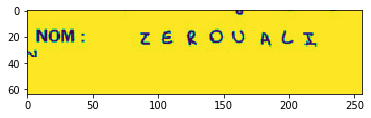

In [93]:
plt.imshow(xtest[0])